In [1]:
from create_epochs import *
import matplotlib.pyplot as plt

In [2]:
eeglab_raw = mne.io.read_raw_eeglab('S1.set')
eeglab_epochs = mne.read_epochs_eeglab('S1_elist_bins_chop_be.set')

eeglab_epochs.event_id

Reading C:\Users\jowan\erpclass\S1.fdt


C:\Users\jowan\AppData\Local\Temp\ipykernel_12748\852442335.py:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeglab_raw = mne.io.read_raw_eeglab('S1.set')


Extracting parameters from C:\Users\jowan\erpclass\S1_elist_bins_chop_be.set...
Not setting metadata
272 matching events found
No baseline correction applied
0 projection items activated
Ready.


C:\Users\jowan\AppData\Local\Temp\ipykernel_12748\852442335.py:2: RuntimeWarning: At least one epoch has multiple events. Only the latency of the first event will be retained.
  eeglab_epochs = mne.read_epochs_eeglab('S1_elist_bins_chop_be.set')


{'B2(221)/206/251': 1,
 'B2,4,10,16(222)/205': 2,
 'B1,5(221)/202': 3,
 'B1,3,7,11(221)/201': 4,
 'B1,3,8,15(222)/201': 5,
 'B1,3,7,13(221)/202': 6,
 'B2,4,9,14(221)/206': 7,
 'B1,3,8,17(222)/202': 8,
 'B2,4,9,12(221)/205': 9,
 'B2,4,10,18(222)/206': 10,
 'B2,6(221)/205': 11,
 'B2,6(222)/205': 12,
 'B2(221)/206': 13,
 'B1,5(222)/201': 14,
 'B2,6(222)/206': 15,
 'B2(221)/205/251': 16,
 'B2(222)/206': 17,
 'B1(222)/201/250': 18}

In [3]:
# This function also works for when eeglab_epochs has been ADed
epochs = epoching(eeglab_raw, eeglab_epochs, 'S1_bdf_18bins.txt', 'S1_elist_bins.txt')

Used Annotations descriptions: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '14', '15', '16', '17', '18', '19', '199', '2', '20', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '22', '221', '222', '23', '230', '24', '240', '25', '250', '251', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'G', 

In [4]:
display(epochs.event_id)

bins = parse_bdf('S1_bdf_18bins.txt')
for v in bins.values():
    print('\n', v)
    display(epochs[v])

{'G': 154,
 'UG': 160,
 'G/Incor': 159,
 'UG/Incor': 165,
 'G/Cor/LVF/NP': 155,
 'UG/Cor/LVF/NP': 161,
 'G/Cor/LVF/VP': 156,
 'UG/Cor/LVF/VP': 162,
 'G/Cor/RVF/NP': 157,
 'UG/Cor/RVF/NP': 163,
 'G/Cor/RVF/VP': 158,
 'UG/Cor/RVF/VP': 164}


 G


Number of events,136
Events,G: 1G/Cor/LVF/NP: 34G/Cor/LVF/VP: 29G/Cor/RVF/NP: 32G/Cor/RVF/VP: 34G/Incor: 6
Time range,-0.100 – 1.299 s
Baseline,off



 UG


Number of events,136
Events,UG: 5UG/Cor/LVF/NP: 31UG/Cor/LVF/VP: 31UG/Cor/RVF/NP: 33UG/Cor/RVF/VP: 32UG/Incor: 4
Time range,-0.100 – 1.299 s
Baseline,off



 G/Cor


Number of events,129
Events,G/Cor/LVF/NP: 34G/Cor/LVF/VP: 29G/Cor/RVF/NP: 32G/Cor/RVF/VP: 34
Time range,-0.100 – 1.299 s
Baseline,off



 UG/Cor


Number of events,127
Events,UG/Cor/LVF/NP: 31UG/Cor/LVF/VP: 31UG/Cor/RVF/NP: 33UG/Cor/RVF/VP: 32
Time range,-0.100 – 1.299 s
Baseline,off



 G/Incor


Number of events,6
Events,G/Incor: 6
Time range,-0.100 – 1.299 s
Baseline,off



 UG/Incor


Number of events,4
Events,UG/Incor: 4
Time range,-0.100 – 1.299 s
Baseline,off



 G/Cor/LVF


Number of events,63
Events,G/Cor/LVF/NP: 34G/Cor/LVF/VP: 29
Time range,-0.100 – 1.299 s
Baseline,off



 G/Cor/RVF


Number of events,66
Events,G/Cor/RVF/NP: 32G/Cor/RVF/VP: 34
Time range,-0.100 – 1.299 s
Baseline,off



 UG/Cor/LVF


Number of events,62
Events,UG/Cor/LVF/NP: 31UG/Cor/LVF/VP: 31
Time range,-0.100 – 1.299 s
Baseline,off



 UG/Cor/RVF


Number of events,65
Events,UG/Cor/RVF/NP: 33UG/Cor/RVF/VP: 32
Time range,-0.100 – 1.299 s
Baseline,off



 G/Cor/LVF/NP


Number of events,34
Events,G/Cor/LVF/NP: 34
Time range,-0.100 – 1.299 s
Baseline,off



 UG/Cor/LVF/NP


Number of events,31
Events,UG/Cor/LVF/NP: 31
Time range,-0.100 – 1.299 s
Baseline,off



 G/Cor/LVF/VP


Number of events,29
Events,G/Cor/LVF/VP: 29
Time range,-0.100 – 1.299 s
Baseline,off



 UG/Cor/LVF/VP


Number of events,31
Events,UG/Cor/LVF/VP: 31
Time range,-0.100 – 1.299 s
Baseline,off



 G/Cor/RVF/NP


Number of events,32
Events,G/Cor/RVF/NP: 32
Time range,-0.100 – 1.299 s
Baseline,off



 UG/Cor/RVF/NP


Number of events,33
Events,UG/Cor/RVF/NP: 33
Time range,-0.100 – 1.299 s
Baseline,off



 G/Cor/RVF/VP


Number of events,34
Events,G/Cor/RVF/VP: 34
Time range,-0.100 – 1.299 s
Baseline,off



 UG/Cor/RVF/VP


Number of events,32
Events,UG/Cor/RVF/VP: 32
Time range,-0.100 – 1.299 s
Baseline,off


In [5]:
evokeds = [epochs[v].average() for v in bins.values()]
len(evokeds)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

18

In [6]:
n_bins = len(evokeds)
n_chs, n_times = evokeds[0].get_data().shape
data = np.array([evokeds[i].get_data(units='uV') for i in range(len(evokeds))], dtype=object).reshape(n_bins, n_chs, n_times)
data.shape

(18, 34, 1400)

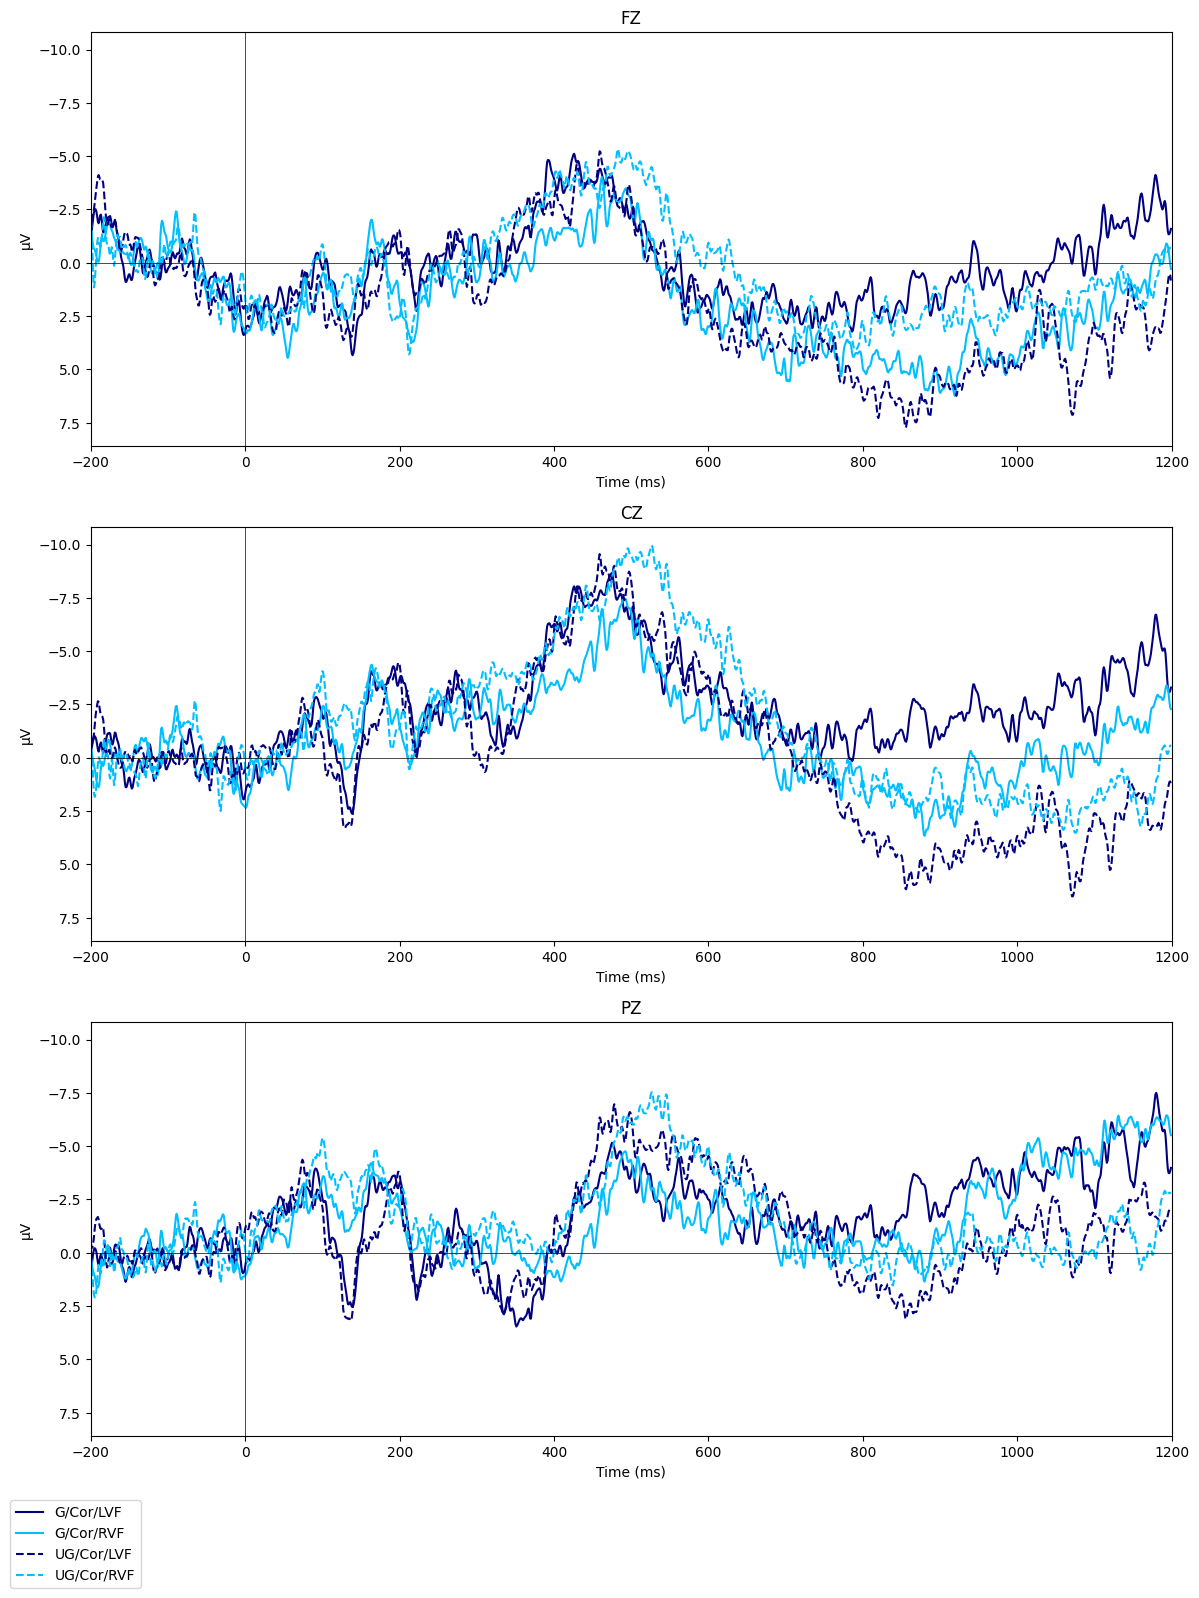

In [7]:
ch_dict = {}
for i, x in enumerate(epochs.ch_names):
    ch_dict[x] = i
    
ch_to_plot = ['FZ', 'CZ', 'PZ']
bins_to_plot = ['G/Cor/LVF', 'G/Cor/RVF', 'UG/Cor/LVF', 'UG/Cor/RVF']

t = [i for i in range(-200, 1200)]
linestyles = ['solid', 'solid', 'dashed', 'dashed']
colors = ['navy','deepskyblue','navy', 'deepskyblue']

figure, axes = plt.subplots(3,1, figsize=(12, 15), sharey=True)
for ax, ch in zip(axes.copy().flatten(), ch_to_plot):
    for i, x in enumerate(bins_to_plot):
        ax.plot(t, data[int(list(bins.keys())[int(list(bins.values()).index(x))])-1][ch_dict[ch]],
                linestyle=linestyles[i], color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch)
    ax.set_xlabel('Time (ms)')
    ax.set_xlim(-200, 1200)
    ax.set_ylabel('µV')
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='upper left', bbox_to_anchor=[-0.001, 0.001])
figure.tight_layout()
plt.show()